<a href="https://colab.research.google.com/github/ZubearFa/Data-Science/blob/main/Model_interpretability_Parkinnson_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
!pip install sklearn_pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
#importing the libraries 
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
from google.colab import files # Use to load data on Google Colab 
uploaded = files.upload() # Use to load data on Google Colab

Saving Parkinsson disease.csv to Parkinsson disease (2).csv


In [58]:
data = pd.read_csv("Parkinsson disease.csv")
datac = pd.read_csv("Parkinsson disease.csv")

In [59]:
data.name = "data"
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,data,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,data,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,data,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,data,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,data,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [60]:
#Data types of the columns present in the DataSet
data.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [61]:
data.count()

name                195
MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      195
MDVP:Jitter(Abs)    195
MDVP:RAP            195
MDVP:PPQ            195
Jitter:DDP          195
MDVP:Shimmer        195
MDVP:Shimmer(dB)    195
Shimmer:APQ3        195
Shimmer:APQ5        195
MDVP:APQ            195
Shimmer:DDA         195
NHR                 195
HNR                 195
status              195
RPDE                195
DFA                 195
spread1             195
spread2             195
D2                  195
PPE                 195
dtype: int64

In [62]:
# To check duplicated values 
print(data.duplicated().value_counts())

False    195
dtype: int64


In [63]:
#changing our Main prediction (dependent) variable "Status" from Bool to Int type for detailed Statistical results
data['status'] = data['status'].astype('int64')

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


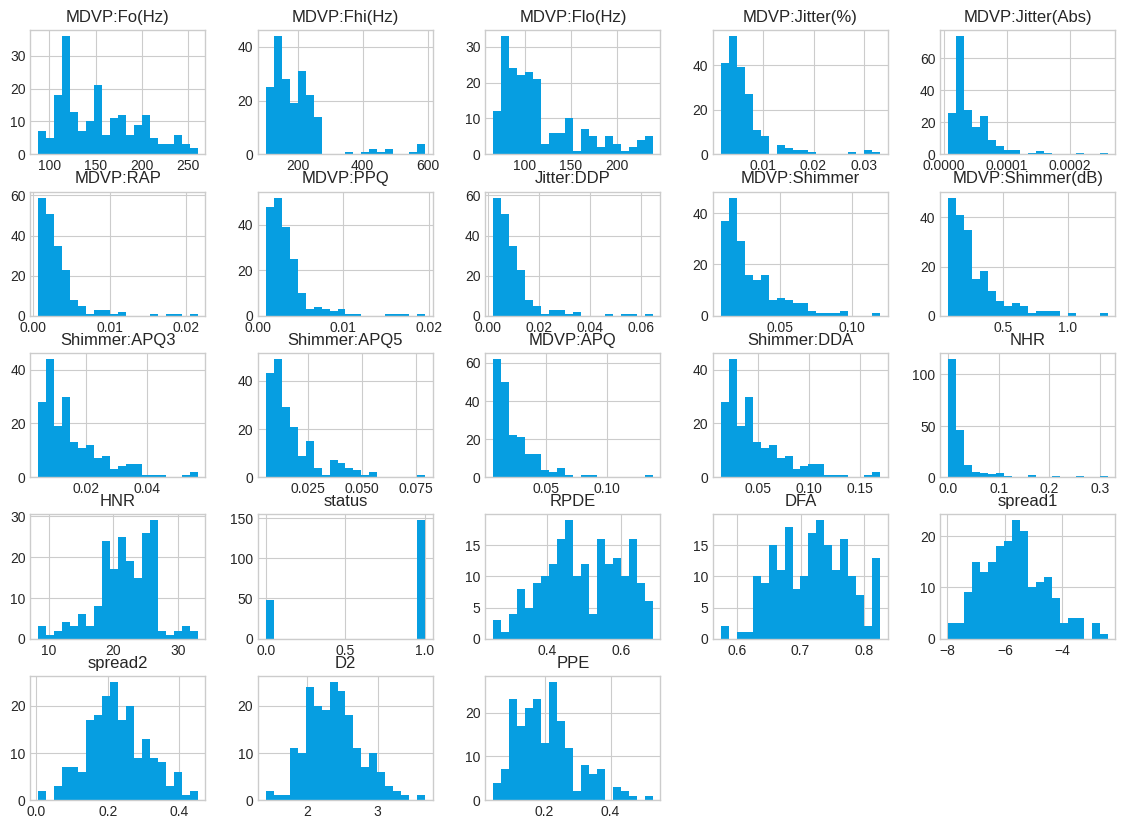

In [64]:
plt.style.use('seaborn-whitegrid')

data.hist(bins=20, figsize=(14,10), color='#069EE1')
plt.show();

<Axes: >

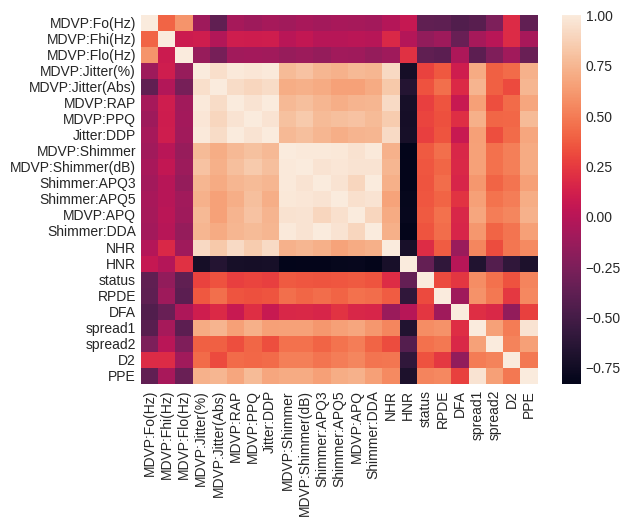

In [65]:
sns.heatmap(data.corr())

<Axes: xlabel='spread1', ylabel='status'>

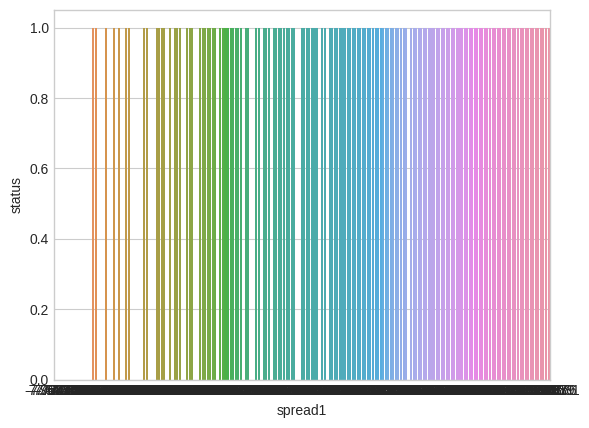

In [66]:
sns.barplot(x = data['spread1'], y = data['status'], data = data)

In [67]:
# We need to check missing values in dataset
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [68]:
drop_list = [
    'MDVP:Fo(Hz)',
    'spread2',
    'D2',
    'Shimmer:APQ3',
    'MDVP:Shimmer',
    'MDVP:Fhi(Hz)',
    'MDVP:Shimmer(dB)',
    'MDVP:APQ',
    'HNR',
    'MDVP:Jitter(Abs)',
    'MDVP:Flo(Hz)',
    'MDVP:Jitter(%)',
    'NHR',
    'Shimmer:APQ5',
    'Jitter:DDP',
    'MDVP:PPQ',
    'Shimmer:DDA',
    'RPDE',
    'DFA',
    'name'
]

data.drop(drop_list,axis=1,inplace=True)
datac.drop(drop_list,axis=1,inplace=True)

In [69]:
#Normalizing all the values present in the dataset.(Categorical values as well.)

data = pd.get_dummies(data)


from sklearn import preprocessing
import pandas as pd

#d = preprocessing.normalize(data)
#scaled_data = pd.DataFrame(d, columns=data.columns)
#scaled_data.head()

In [70]:
# Normalizing the data in the columns beacuse some values are too high when compared to other independent variable

from sklearn import preprocessing

# Create x to store scaled values as floats

x = data[['MDVP:RAP','spread1', 'PPE', 'status']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data[['MDVP:RAP','spread1', 'PPE', 'status']] = pd.DataFrame(x_scaled)

In [71]:
data.head()

,MDVP:RAP,status,spread1,PPE
0,0.145472,1.0,0.569875,0.497310
1,0.191233,1.0,0.703277,0.671326
2,0.229287,1.0,0.636745,0.596682
3,0.209056,1.0,0.695627,0.671949
4,0.282755,1.0,0.762472,0.757611


In [72]:
data2 = data.copy(deep=True)

In [73]:
#Removing target variable from dataset. to create input varaibles and output (or) target variable.
y = data['status']
#x = data[['BHK','Size','Floor','Area Type','City','Furnishing Status','Tenant Preferred','Bathroom','Point of Contact']]
#'Area Locality'
drop_list2 = ['status']
data2.drop(drop_list2,axis=1,inplace=True)
x = data2.copy(deep=True)

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split( x, y, test_size=0.2, shuffle=False)

In [75]:
from sklearn.preprocessing import LabelEncoder
X_train = X_train.apply(LabelEncoder().fit_transform)
X_test = X_test.apply(LabelEncoder().fit_transform)

In [76]:
#Data Preprocessing
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,KFold
#Importing Models
from sklearn.linear_model import LinearRegression,Lasso,Ridge,BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [77]:
#ss=StandardScaler()
#X_train=ss.fit_transform(X_train)
#X_test=ss.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
y_pred = lin_reg.predict(X_test)

print('Error', np.sqrt(mean_squared_error(Y_test, y_pred)))

Error 0.4912143472467757


In [78]:
print(lin_reg.score(X_test, Y_test))
print(r2_score(Y_test, y_pred))

-0.0194567351260464
-0.0194567351260464


<Axes: title={'center': "Model Coeff's"}>

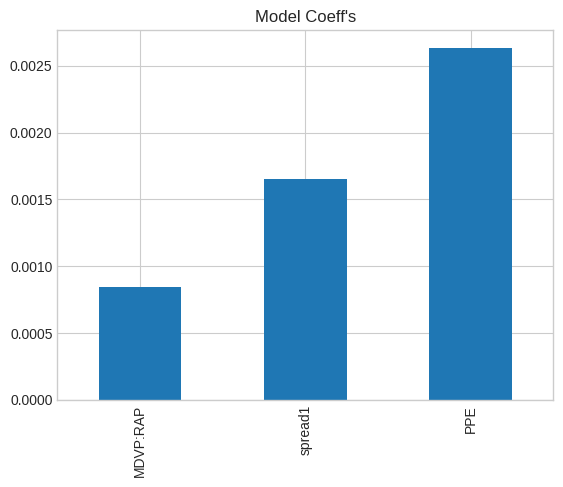

In [79]:
coef = pd.Series(lin_reg.coef_, x.columns).sort_values()
coef.plot(kind='bar', title =  'Model Coeff\'s')

In [80]:
reg = sm.OLS(Y_train, X_train).fit()

In [81]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 status   R-squared (uncentered):                   0.843
Model:                            OLS   Adj. R-squared (uncentered):              0.840
Method:                 Least Squares   F-statistic:                              274.9
Date:                Thu, 30 Mar 2023   Prob (F-statistic):                    2.20e-61
Time:                        01:58:01   Log-Likelihood:                         -63.661
No. Observations:                 156   AIC:                                      133.3
Df Residuals:                     153   BIC:                                      142.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MDVP:RAP       0.0033      0.001      2.799      0.006       0.001       0.006
spread1        0.0028      0.003      0.934      0.352      -0.003       0.009
PPE            0.0040      0.003      1.338      0.183      -0.002       0.010
==============================================================================
Omnibus:                       15.088   Durbin-Watson:                   0.712
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                7.808
Skew:                           0.359   Prob(JB):                       0.0202
Kurtosis:                       2.171   Cond. No.                         20.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
import shap
shap.initjs()
model = LinearRegression()
model.fit(X_test, Y_test)

LinearRegression()

In [84]:
explainer = shap.LinearExplainer(model, X_test)
shap_values = explainer.shap_values(X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


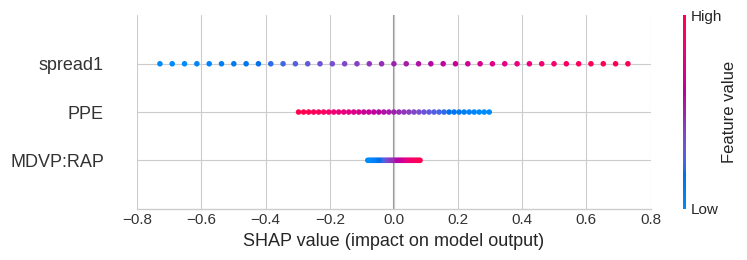

In [85]:
# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values, X_test)

In [86]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test)

In [87]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.2, shuffle=False)
catagorical_features = []
numerical_features = [c for c in X_train2.columns if c not in catagorical_features]
cat = [([c], [OrdinalEncoder()]) for c in catagorical_features]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num + cat, df_out=True)
reg = RandomForestRegressor()

def evaluate(x, y, mapper=None, reg=None, transform=False):
    if transform:
        x = mapper.transform(x)
        x = sm.add_constant(x, has_constant='add') 
    y_pred2 = reg.predict(x)
    return mean_absolute_error(y, y_pred2)

pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])
p = pipeline.fit(X_train2, y_train2)

train_mae = evaluate(X_train2, y_train2, reg=pipeline)
print(f"train MAE = {round(train_mae, 3)}")

train MAE = 0.024


In [88]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.2, shuffle=False)
catagorical_features = []
numerical_features = [c for c in X_test2.columns if c not in catagorical_features]
cat = [([c], [OrdinalEncoder()]) for c in catagorical_features]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num + cat, df_out=True)
reg = RandomForestRegressor()

def evaluate(x, y, mapper=None, reg=None, transform=False):
    if transform:
        x = mapper.transform(x)
        x = sm.add_constant(x, has_constant='add') 
    y_pred2 = reg.predict(x)
    return mean_absolute_error(y, y_pred2)

pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])
p = pipeline.fit(X_test2, y_test2)

test_mae = evaluate(X_test2, y_test2, reg=pipeline)
print(f"test MAE = {round(test_mae, 3)}")

test MAE = 0.113


<BarContainer object of 3 artists>

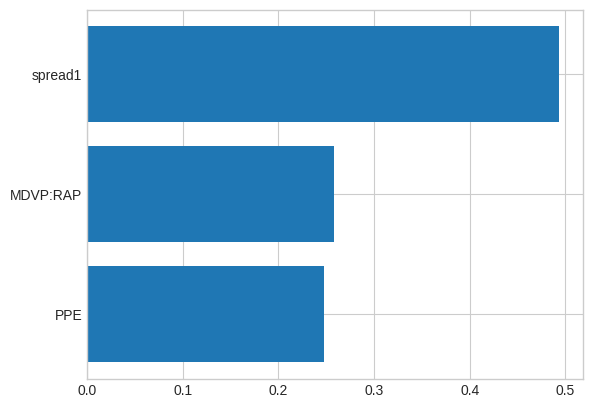

In [89]:
sorted_idx = reg.feature_importances_.argsort()
features = numerical_features + catagorical_features 
result = sorted(zip(features, reg.feature_importances_), key = lambda x: x[1], reverse=False)
plt.barh([x[0] for x in result], [x[1] for x in result])

In [90]:
datac = pd.get_dummies(datac)

In [91]:
datac2 = datac.copy(deep=True)

In [92]:
#Removing target variable from dataset. to create input varaibles and output (or) target variable.
y2 = datac2['status']
#x = data[['BHK','Size','Floor','Area Type','City','Furnishing Status','Tenant Preferred','Bathroom','Point of Contact']]
#'Area Locality'
drop_list3 = ['status']
datac2.drop(drop_list2,axis=1,inplace=True)
x2 = datac2.copy(deep=True)

In [93]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, shuffle=False)
my_model = RandomForestClassifier(random_state=0).fit(X_train2, y_train2)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


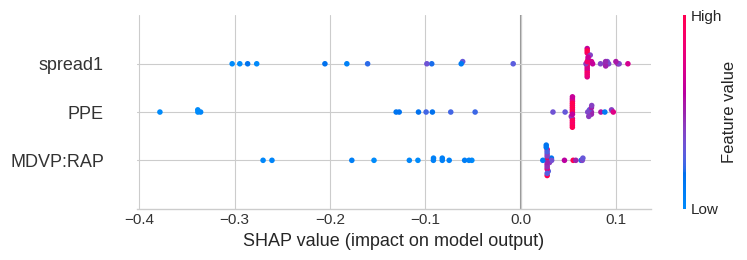

In [94]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test2)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], X_test2)

In [95]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test2)

In [96]:
! pip install h2o
#Installing H20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.2-py2.py3-none-any.whl size=177693439 sha256=ee07f6f4b25e9d6875d42d0d9197b802b2468190482ffbef630b71a316f72c91
  Stored in directory: /root/.cache/pip/wheels/b2/79/e3/842b81607eb31946ee24898cc9961b101e6486f988a5103967
Successfully built h2o


In [97]:
import h2o
from h2o.automl import H2OAutoML
import os

In [98]:
h2o.init(strict_version_check=False)
#taken from references
#It starts the H2o clusters

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpvgm6rv15
  JVM stdout: /tmp/tmpvgm6rv15/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpvgm6rv15/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_4dgd3v
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [99]:
df = h2o.import_file("Parkinsson disease.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [100]:
drop_list_auto = [
    'MDVP:Fo(Hz)',
    'spread2',
    'D2',
    'Shimmer:APQ3',
    'MDVP:Shimmer',
    'MDVP:Fhi(Hz)',
    'MDVP:Shimmer(dB)',
    'MDVP:APQ',
    'HNR',
    'MDVP:Jitter(Abs)',
    'MDVP:Flo(Hz)',
    'MDVP:Jitter(%)',
    'NHR',
    'Shimmer:APQ5',
    'Jitter:DDP',
    'MDVP:PPQ',
    'Shimmer:DDA',
    'RPDE',
    'DFA',
    'name'
]

df.drop(drop_list_auto,axis=1)

MDVP:RAP,status,spread1,PPE
0.0037,1,-4.81303,0.284654
0.00465,1,-4.07519,0.368674
0.00544,1,-4.44318,0.332634
0.00502,1,-4.1175,0.368975
0.00655,1,-3.74779,0.410335
0.00463,1,-4.24287,0.357775
0.00155,1,-5.63432,0.211756
0.00144,1,-6.1676,0.163755
0.00293,1,-5.49868,0.231571
0.00268,1,-5.01188,0.271362


In [101]:
df_train,df_test,df_valid = df.split_frame(ratios=[.7, .15])

In [102]:
y3 = "status"
x3 = df.columns
x3.remove(y3)

In [103]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = [], verbosity="info", nfolds=0)

In [104]:
aml.train(x = x3, y = y3, training_frame = df_train, validation_frame=df_valid)

AutoML progress: |
02:07:51.464: Project: AutoML_1_20230330_20751
02:07:51.470: Cross-validation disabled by user: no fold column nor nfolds > 1.
02:07:51.473: Setting stopping tolerance adaptively based on the training frame: 0.05
02:07:51.474: Build control seed: 10
02:07:51.475: training frame: Frame key: AutoML_1_20230330_20751_training_py_3_sid_be9e    cols: 24    rows: 136  chunks: 1    size: 12888  checksum: -2461623309562553716
02:07:51.477: validation frame: Frame key: py_5_sid_be9e    cols: 24    rows: 31  chunks: 1    size: 4475  checksum: -7351239135826996824
02:07:51.477: leaderboard frame: Frame key: py_5_sid_be9e    cols: 24    rows: 31  chunks: 1    size: 4475  checksum: -7351239135826996824
02:07:51.485: blending frame: NULL
02:07:51.485: response column: status
02:07:51.486: fold column: null
02:07:51.486: weights column: null
02:07:51.561: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]},

,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,60.0,60.0,9903.0,4.0,8.0,5.633333,5.0,10.0,8.583333
,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2023-03-30 02:07:57,0.003 sec,0.0,0.4371755,0.3822448,0.1911224,0.4193007,0.3669355,0.1758131
,2023-03-30 02:07:58,0.071 sec,5.0,0.3292845,0.2825425,0.1084283,0.3388461,0.2687478,0.1148166
,2023-03-30 02:07:58,0.126 sec,10.0,0.2611521,0.2154448,0.0682004,0.2959138,0.2123459,0.0875650
,2023-03-30 02:07:58,0.189 sec,15.0,0.2147714,0.1660144,0.0461268,0.2775177,0.1786431,0.0770161
,2023-03-30 02:07:58,0.327 sec,20.0,0.1810565,0.1294006,0.0327815,0.2619988,0.1490257,0.0686434
,2023-03-30 02:07:58,0.493 sec,25.0,0.1548552,0.1032454,0.0239801,0.2521843,0.1312617,0.0635969
,2023-03-30 02:07:58,0.610 sec,30.0,0.1338701,0.0879396,0.0179212,0.2491177,0.1306351,0.0620596
,2023-03-30 02:07:58,0.696 sec,35.0,0.1197150,0.0774384,0.0143317,0.2384776,0.1218252,0.0568716


In [105]:
lb = aml.leaderboard

In [106]:
lb.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_4_AutoML_1_20230330_20751,0.227253,0.051644,0.115705,0.172553,0.051644
XGBoost_1_AutoML_1_20230330_20751,0.238767,0.0570095,0.122285,0.169092,0.0570095
XRT_1_AutoML_1_20230330_20751,0.240022,0.0576105,0.105094,0.177718,0.0576105
GBM_2_AutoML_1_20230330_20751,0.241419,0.0582831,0.114942,0.177492,0.0582831
XGBoost_2_AutoML_1_20230330_20751,0.241885,0.0585084,0.127416,0.180506,0.0585084
XGBoost_3_AutoML_1_20230330_20751,0.244575,0.0598169,0.0955714,0.172184,0.0598169
GBM_3_AutoML_1_20230330_20751,0.248527,0.0617657,0.110309,0.181383,0.0617657
DRF_1_AutoML_1_20230330_20751,0.256876,0.0659854,0.101746,0.187379,0.0659854
GBM_5_AutoML_1_20230330_20751,0.279491,0.0781153,0.109859,0.199302,0.0781153
GLM_1_AutoML_1_20230330_20751,0.31822,0.101264,0.228603,0.226094,0.101264


In [107]:
df_pred=aml.leader.predict(df_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [108]:
df_pred.head()

predict
1.0246
1.09043
1.02863
0.00552754
0.675002
0.951901
0.00733984
0.977582
0.531557
1.01017


In [109]:
aml.leader.model_performance(df_test)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.09327329621722989
RMSE: 0.30540677172785463
MAE: 0.19367983862995214
RMSLE: 0.20470258746302925
Mean Residual Deviance: 0.09327329621722989

In [110]:
import shap
shap.initjs()

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo,predict
GBM_5_AutoML_1_20230330_20751,0.270953,0.0734156,0.154501,0.185985,0.0734156,1659,0.112174,GBM,0.992644
DRF_1_AutoML_1_20230330_20751,0.296445,0.0878797,0.170187,0.208151,0.0878797,1268,0.264134,DRF,0.998294
XGBoost_3_AutoML_1_20230330_20751,0.296482,0.0879015,0.167638,0.199845,0.0879015,270,0.14899,XGBoost,1.00278
GBM_3_AutoML_1_20230330_20751,0.298654,0.0891939,0.185881,0.203335,0.0891939,691,0.095398,GBM,1.0078
GBM_4_AutoML_1_20230330_20751,0.305407,0.0932733,0.19368,0.204703,0.0932733,1110,0.295386,GBM,1.0246
XGBoost_2_AutoML_1_20230330_20751,0.313748,0.098438,0.201019,0.218299,0.098438,310,0.121875,XGBoost,0.996829
GBM_2_AutoML_1_20230330_20751,0.318589,0.101499,0.206017,0.213243,0.101499,1084,0.10544,GBM,1.01202
XRT_1_AutoML_1_20230330_20751,0.322953,0.104299,0.195955,0.224575,0.104299,1725,0.336502,DRF,0.999104
GLM_1_AutoML_1_20230330_20751,0.341664,0.116735,0.289615,0.235856,0.116735,375,0.354511,GLM,1.16007
XGBoost_1_AutoML_1_20230330_20751,0.361887,0.130962,0.227589,0.233344,0.130962,1637,0.052776,XGBoost,1.02554


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

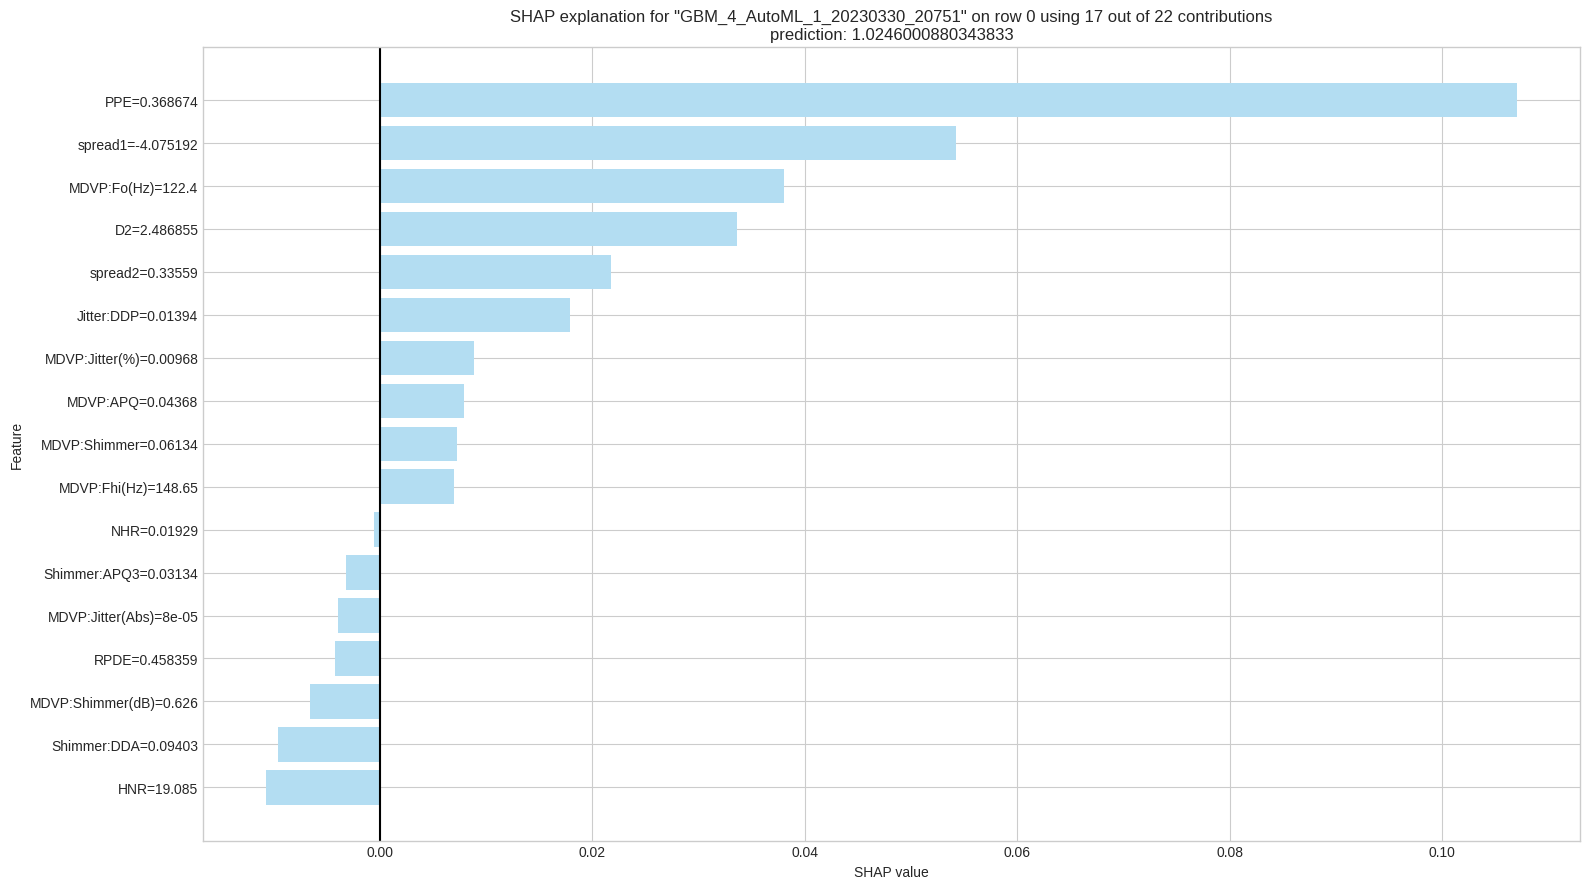

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo,predict
GBM_5_AutoML_1_20230330_20751,0.270953,0.0734156,0.154501,0.185985,0.0734156,1659,0.112174,GBM,0.992644
DRF_1_AutoML_1_20230330_20751,0.296445,0.0878797,0.170187,0.208151,0.0878797,1268,0.264134,DRF,0.998294
XGBoost_3_AutoML_1_20230330_20751,0.296482,0.0879015,0.167638,0.199845,0.0879015,270,0.14899,XGBoost,1.00278
GBM_3_AutoML_1_20230330_20751,0.298654,0.0891939,0.185881,0.203335,0.0891939,691,0.095398,GBM,1.0078
GBM_4_AutoML_1_20230330_20751,0.305407,0.0932733,0.19368,0.204703,0.0932733,1110,0.295386,GBM,1.0246
XGBoost_2_AutoML_1_20230330_20751,0.313748,0.098438,0.201019,0.218299,0.098438,310,0.121875,XGBoost,0.996829
GBM_2_AutoML_1_20230330_20751,0.318589,0.101499,0.206017,0.213243,0.101499,1084,0.10544,GBM,1.01202
XRT_1_AutoML_1_20230330_20751,0.322953,0.104299,0.195955,0.224575,0.104299,1725,0.336502,DRF,0.999104
GLM_1_AutoML_1_20230330_20751,0.341664,0.116735,0.289615,0.235856,0.116735,375,0.354511,GLM,1.16007
XGBoost_1_AutoML_1_20230330_20751,0.361887,0.130962,0.227589,0.233344,0.130962,1637,0.052776,XGBoost,1.02554


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [112]:
aml.explain_row(df_test, row_index=0)

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

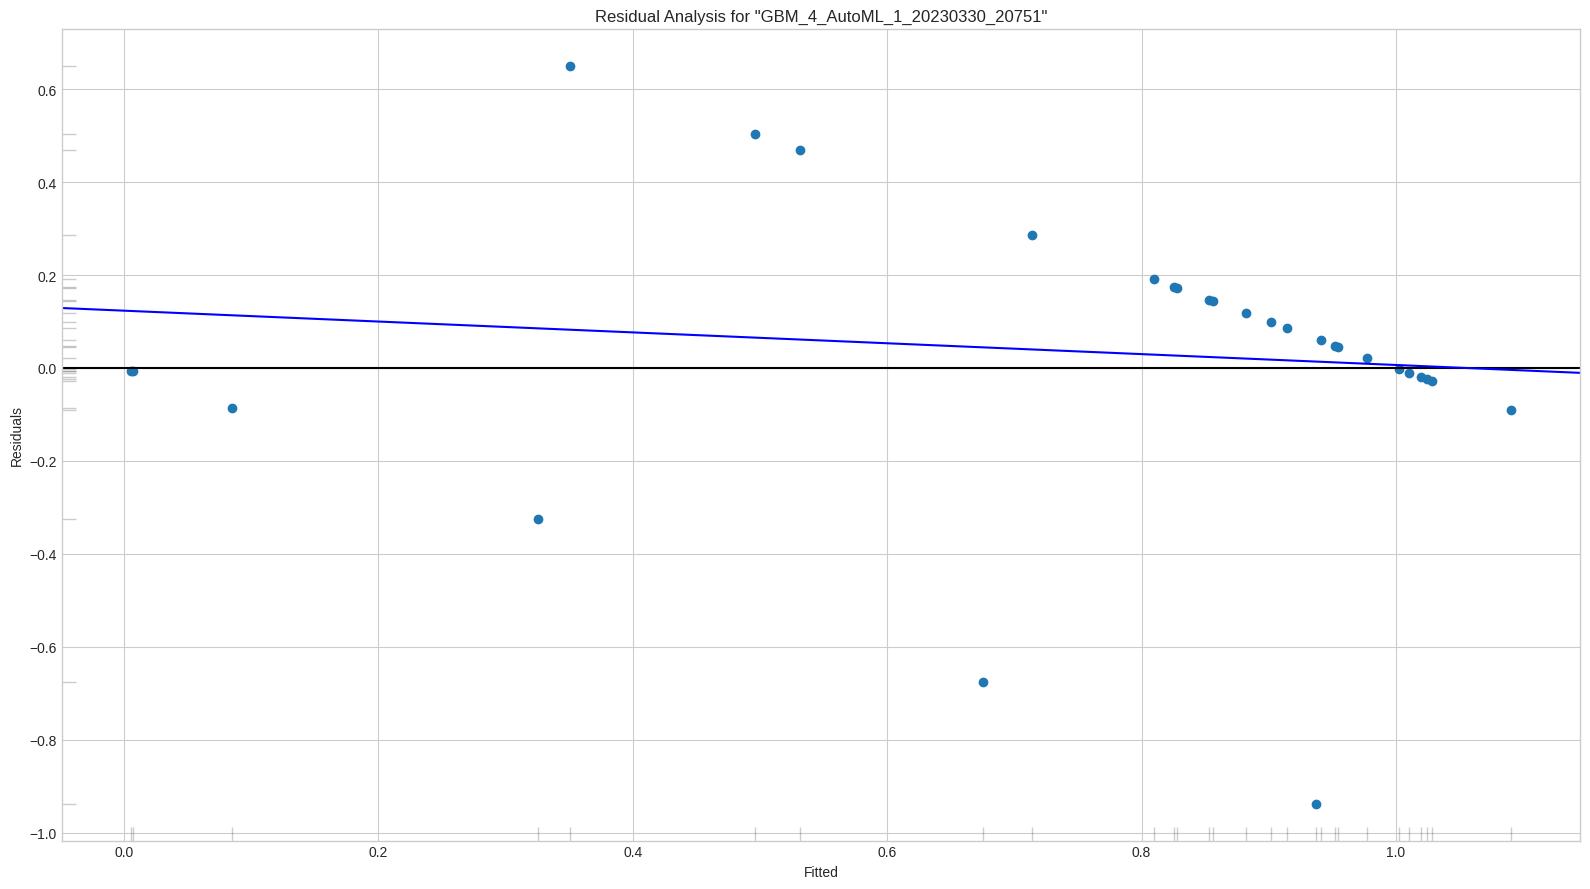

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

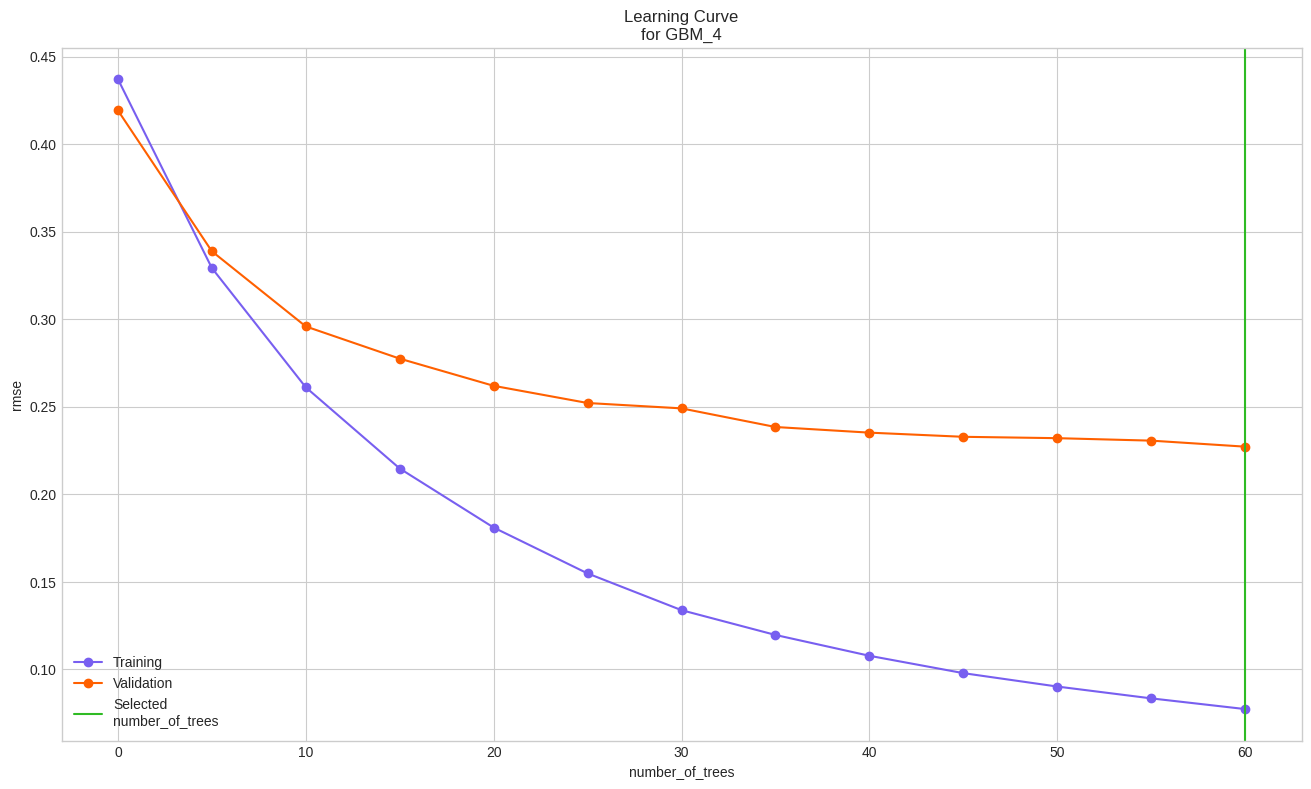

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

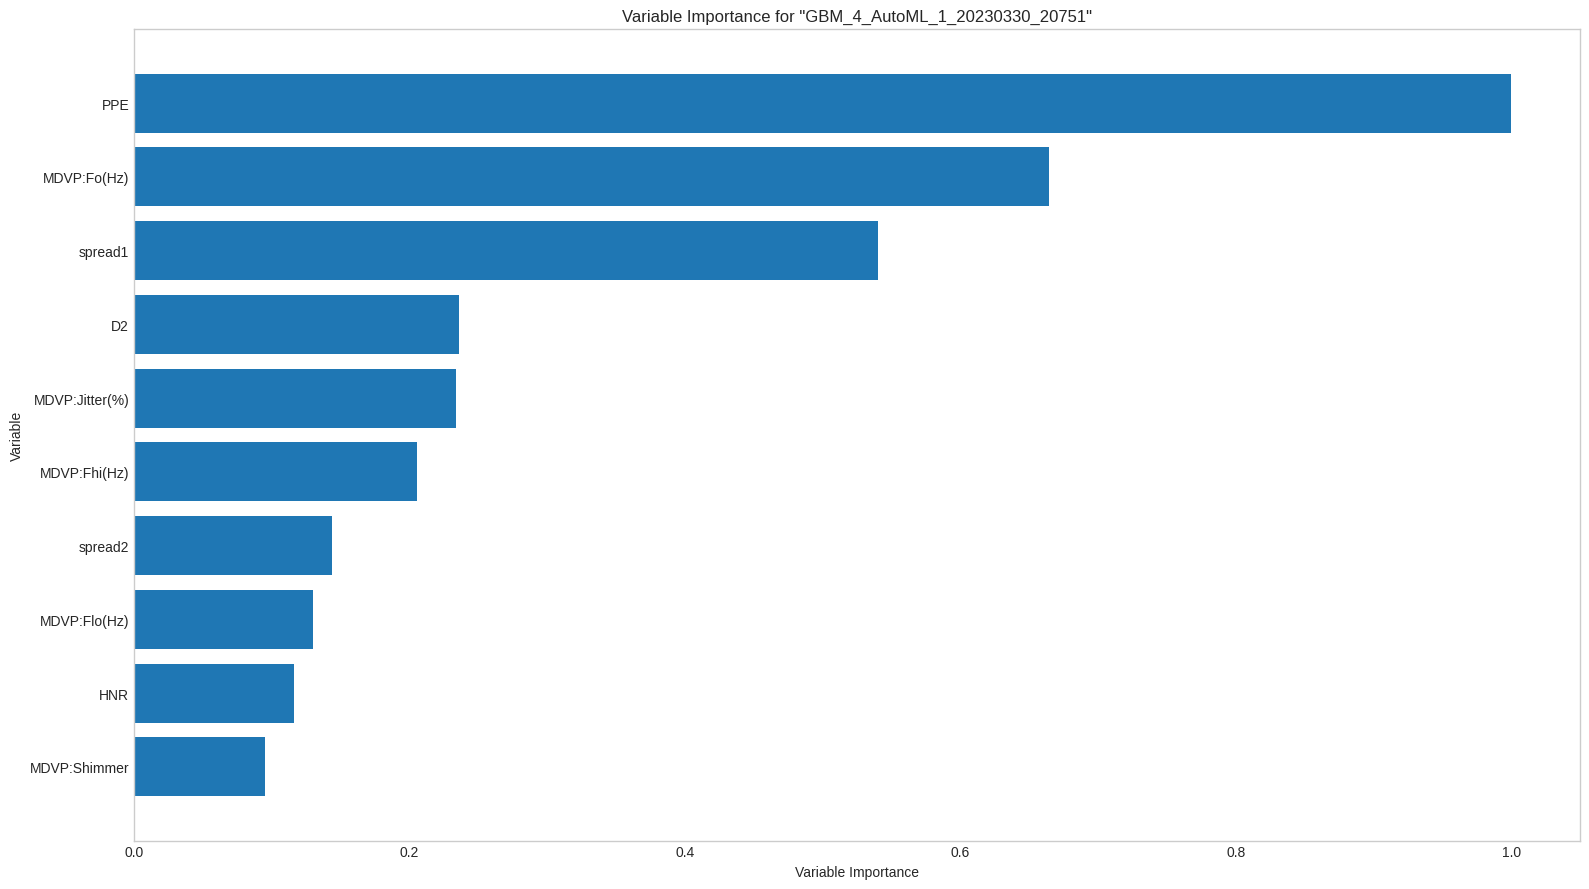

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

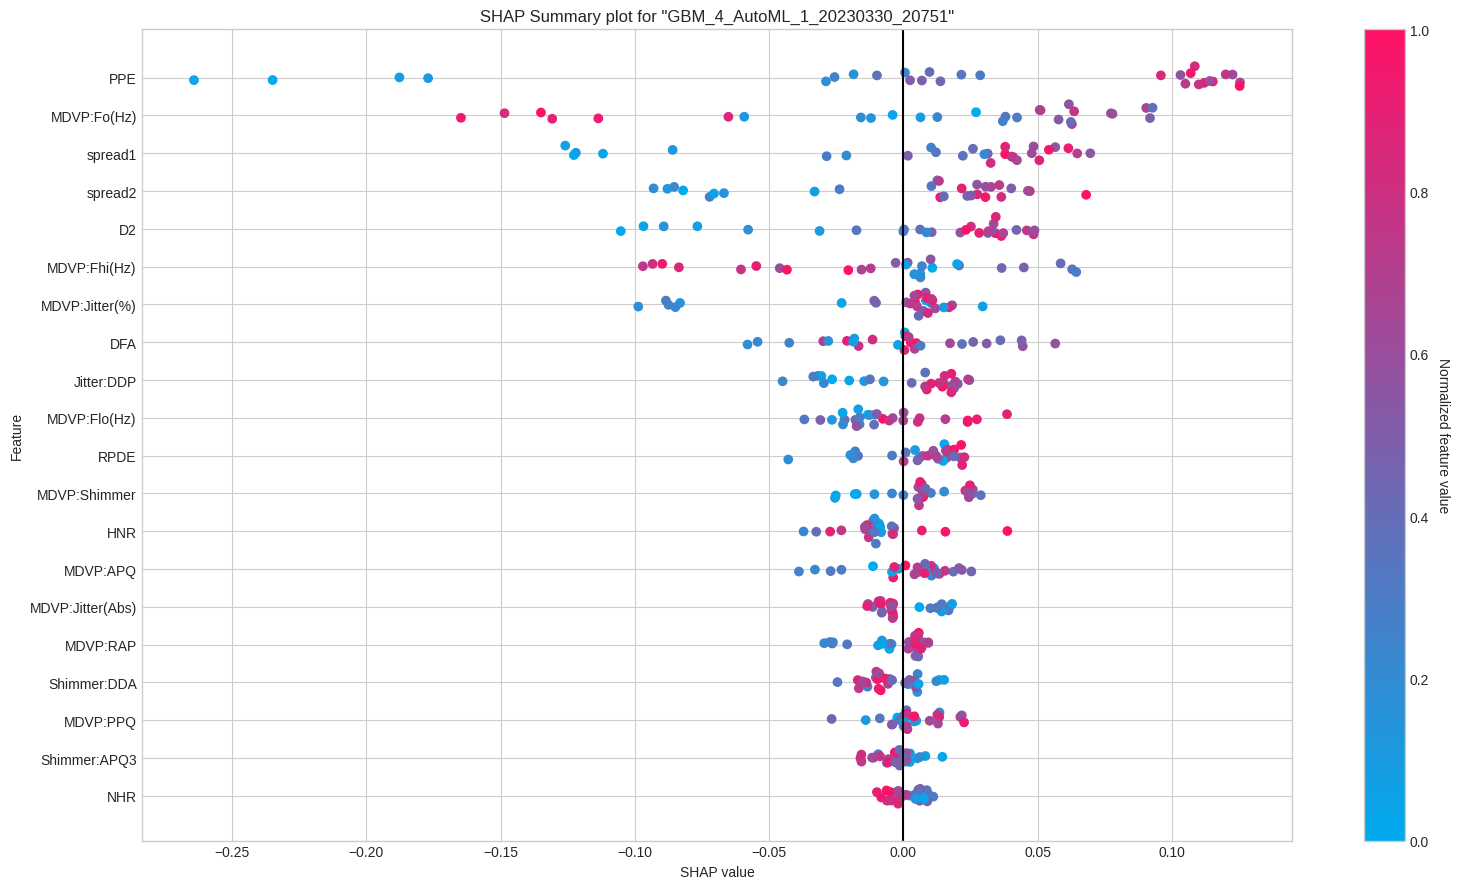

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

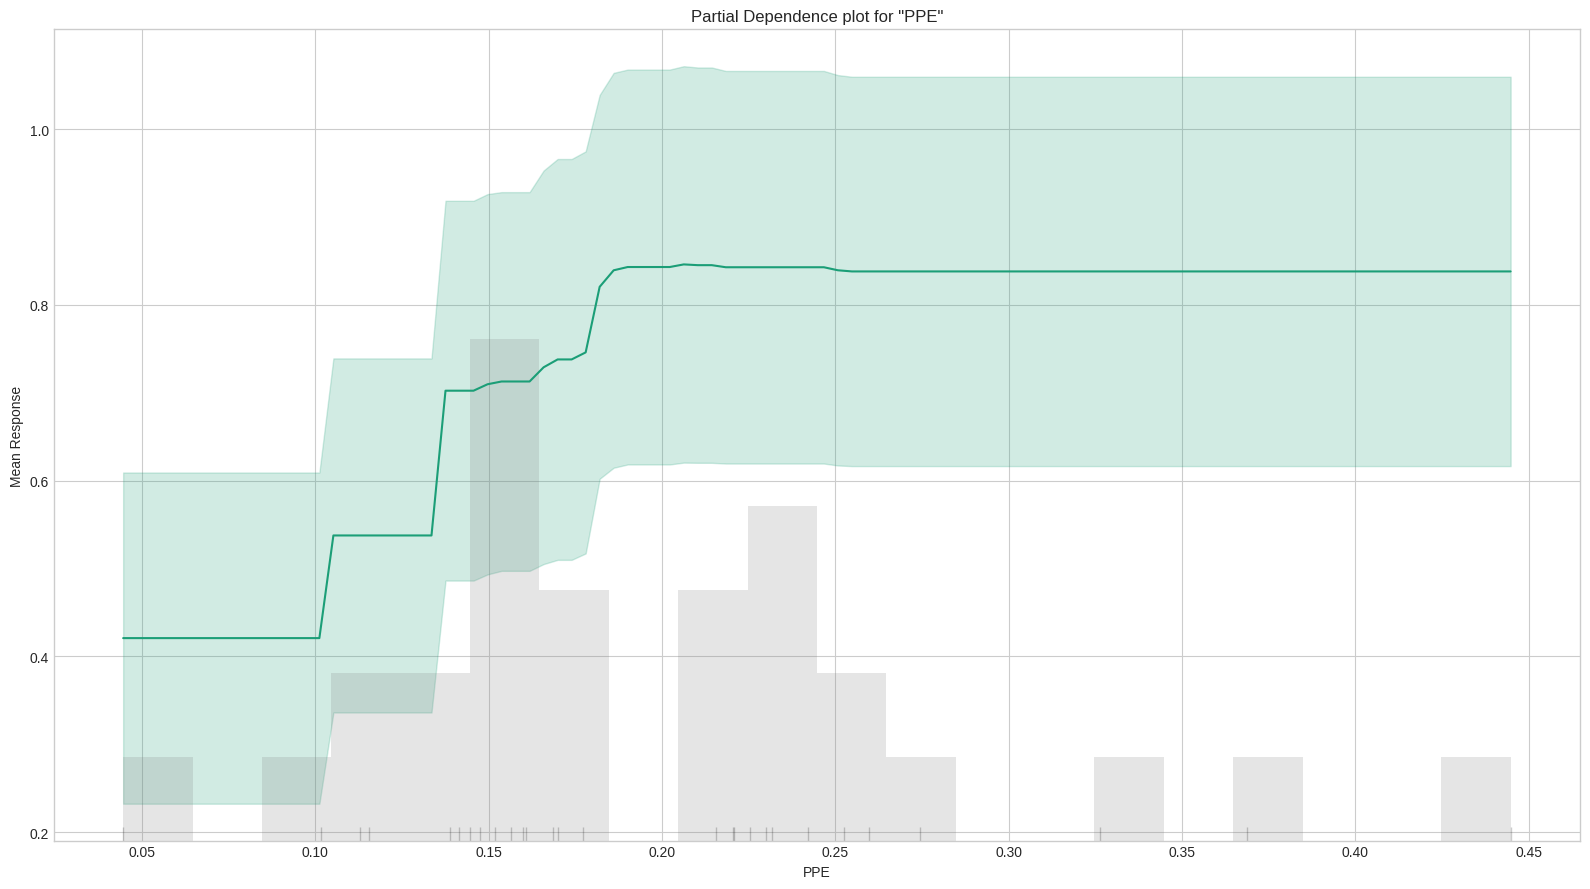

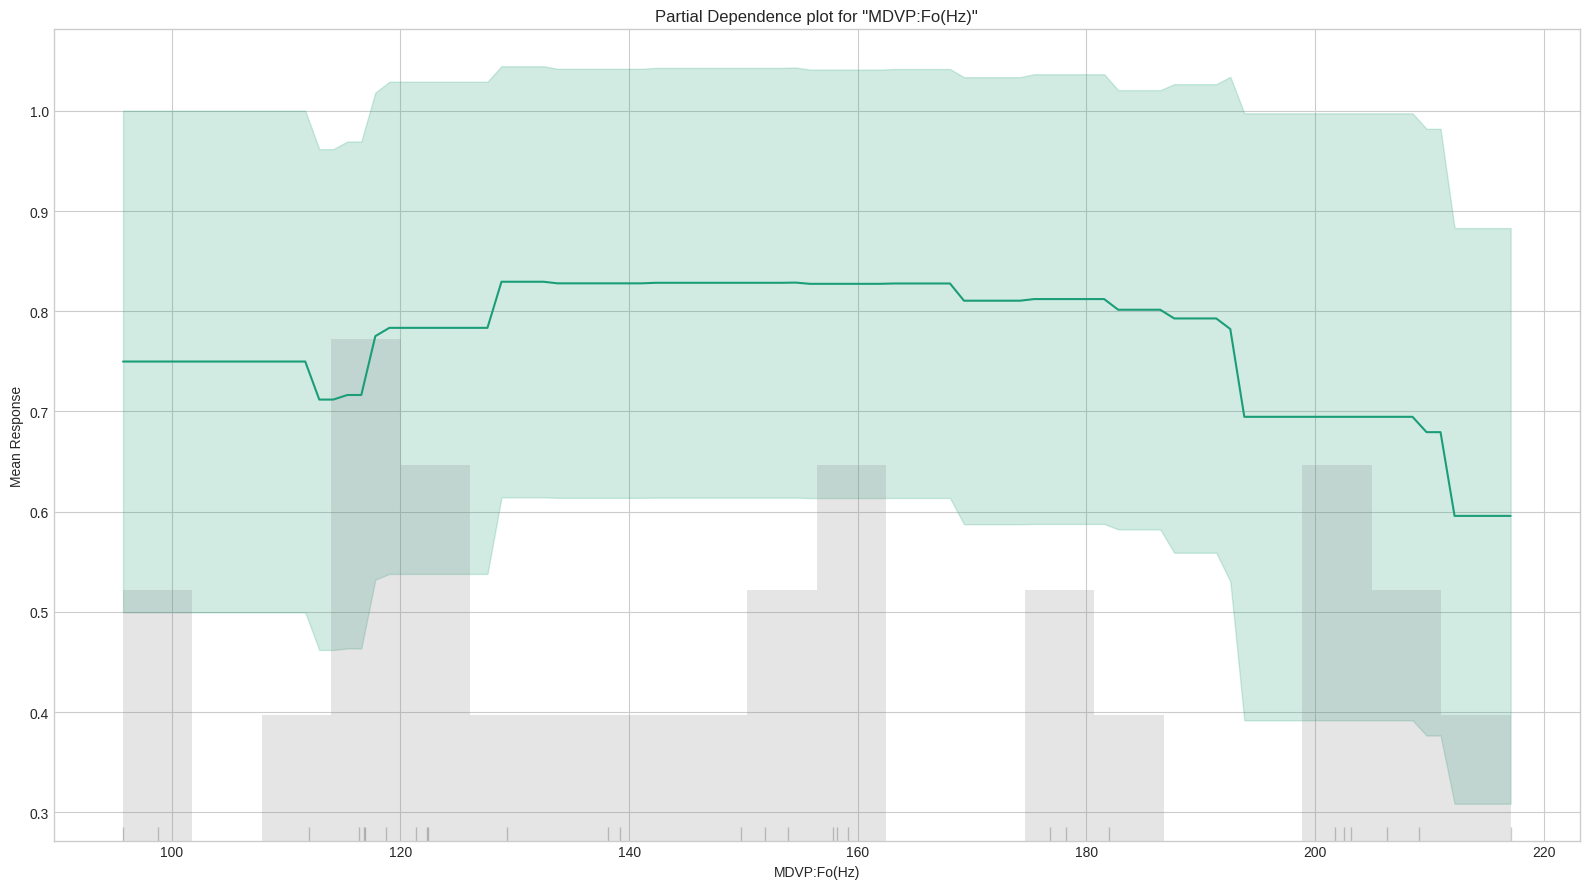

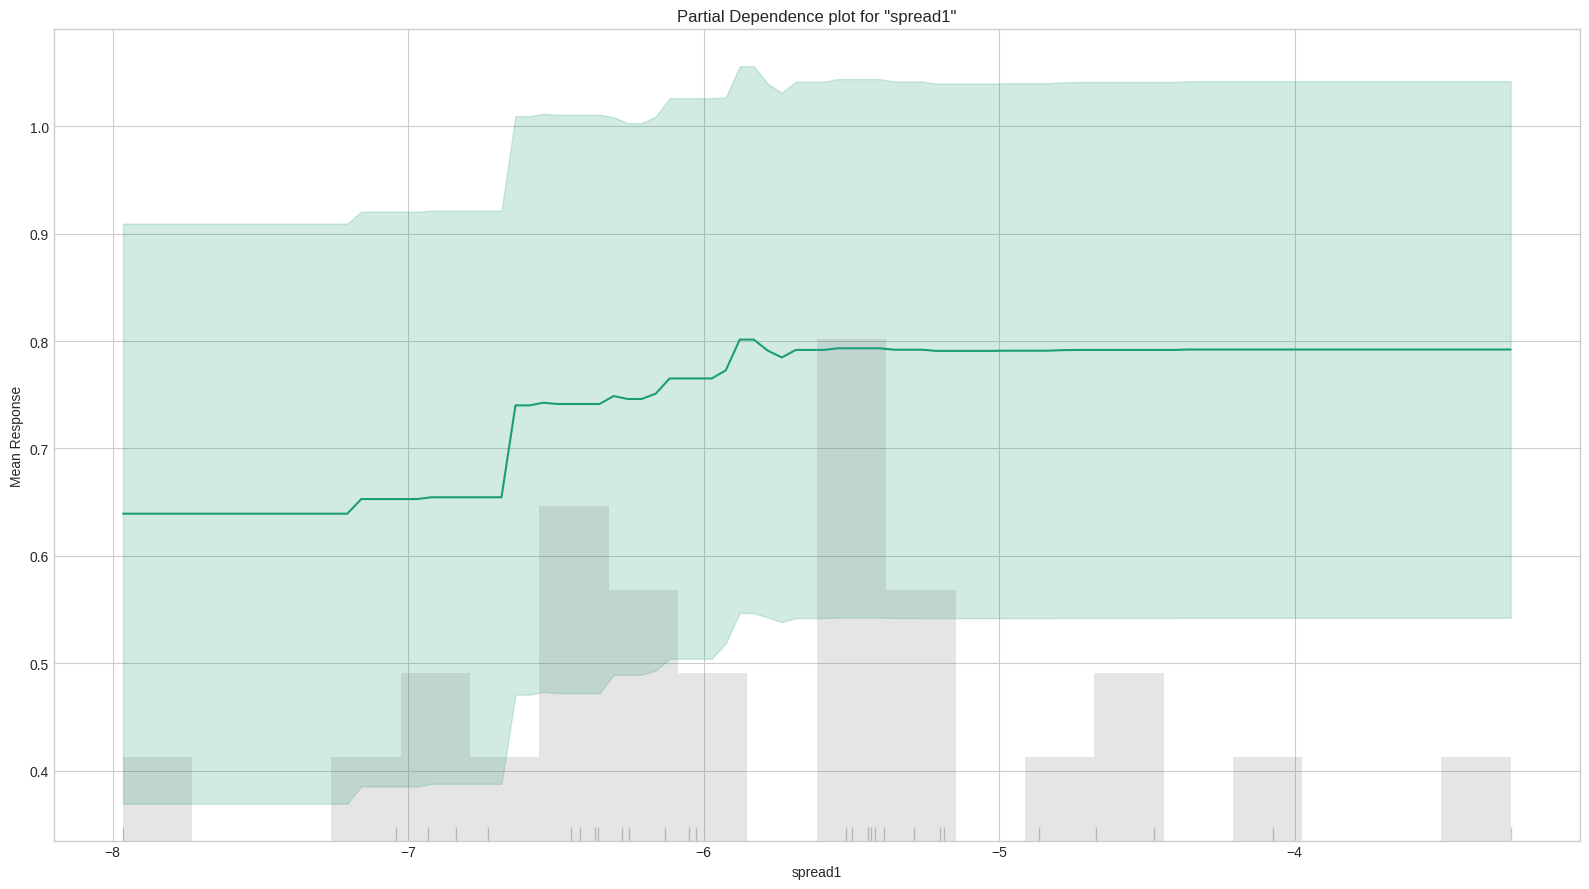

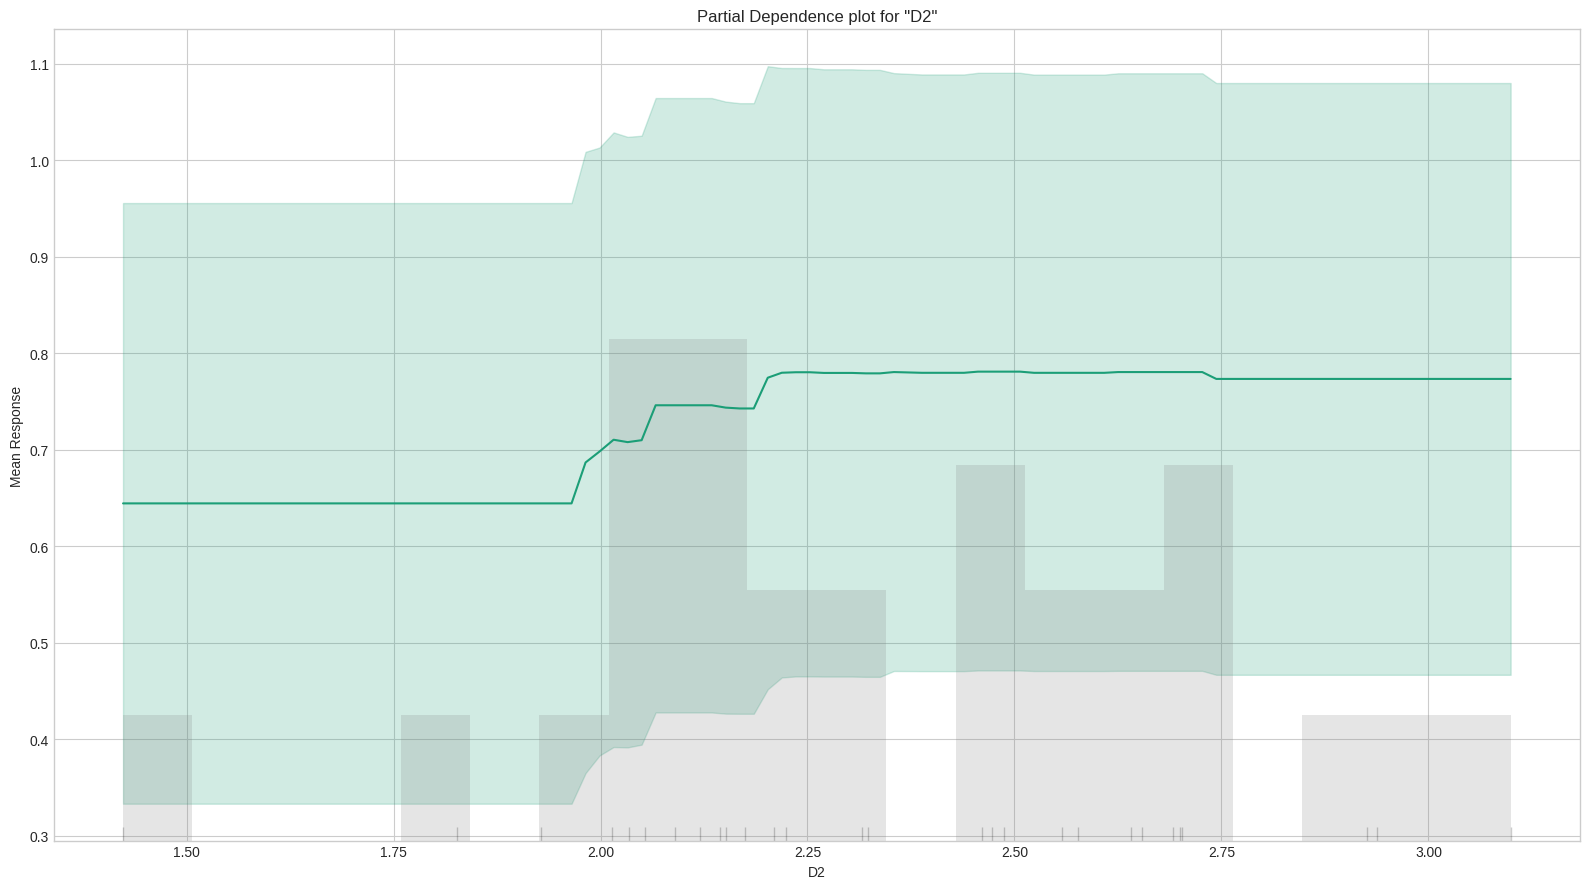

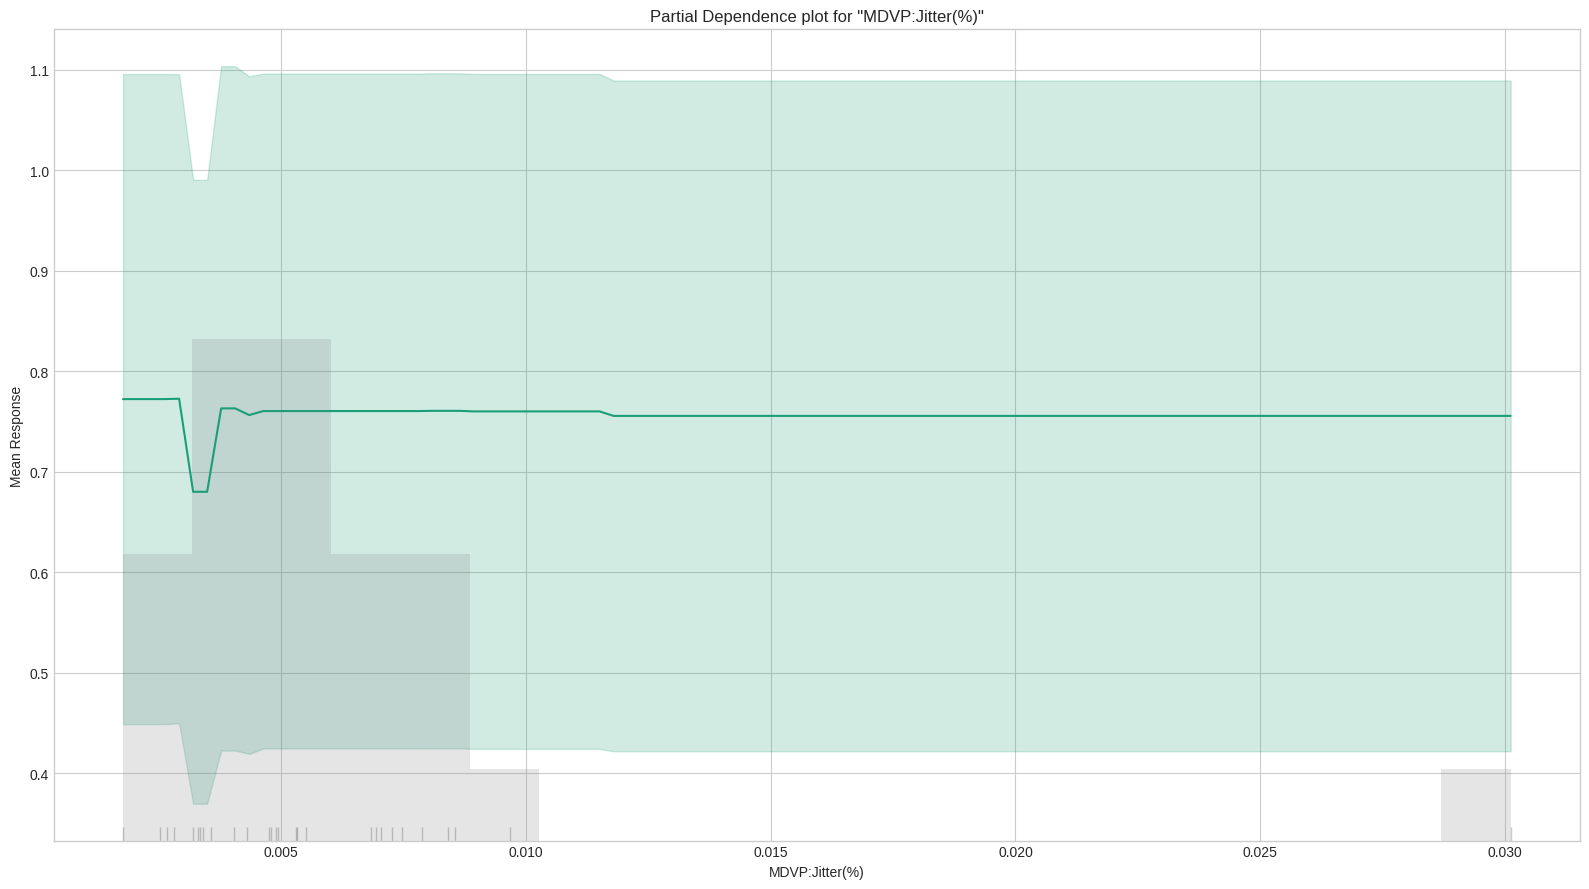

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

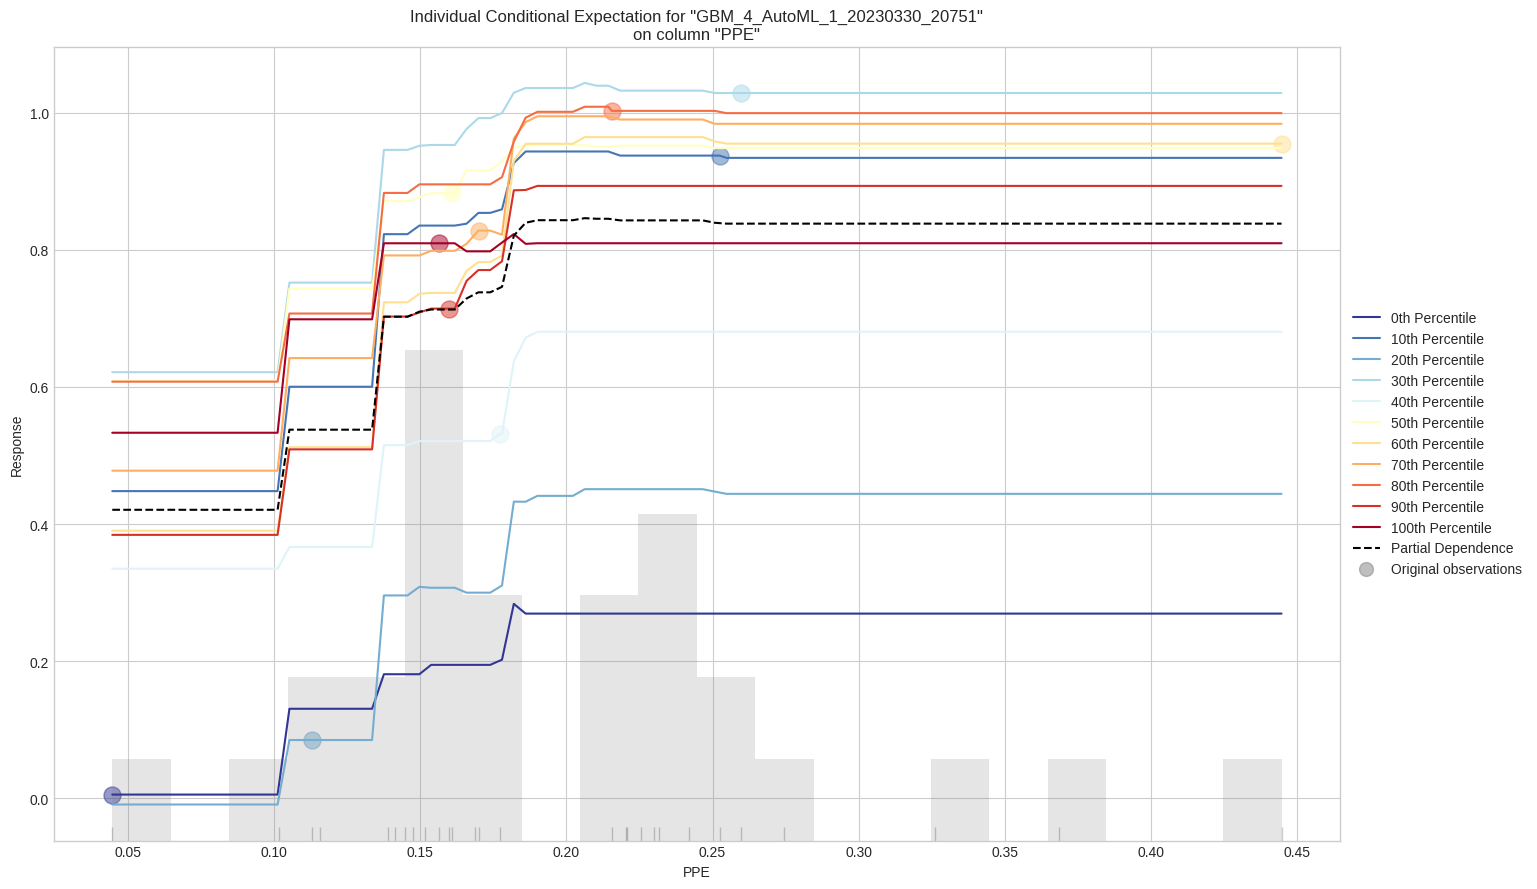

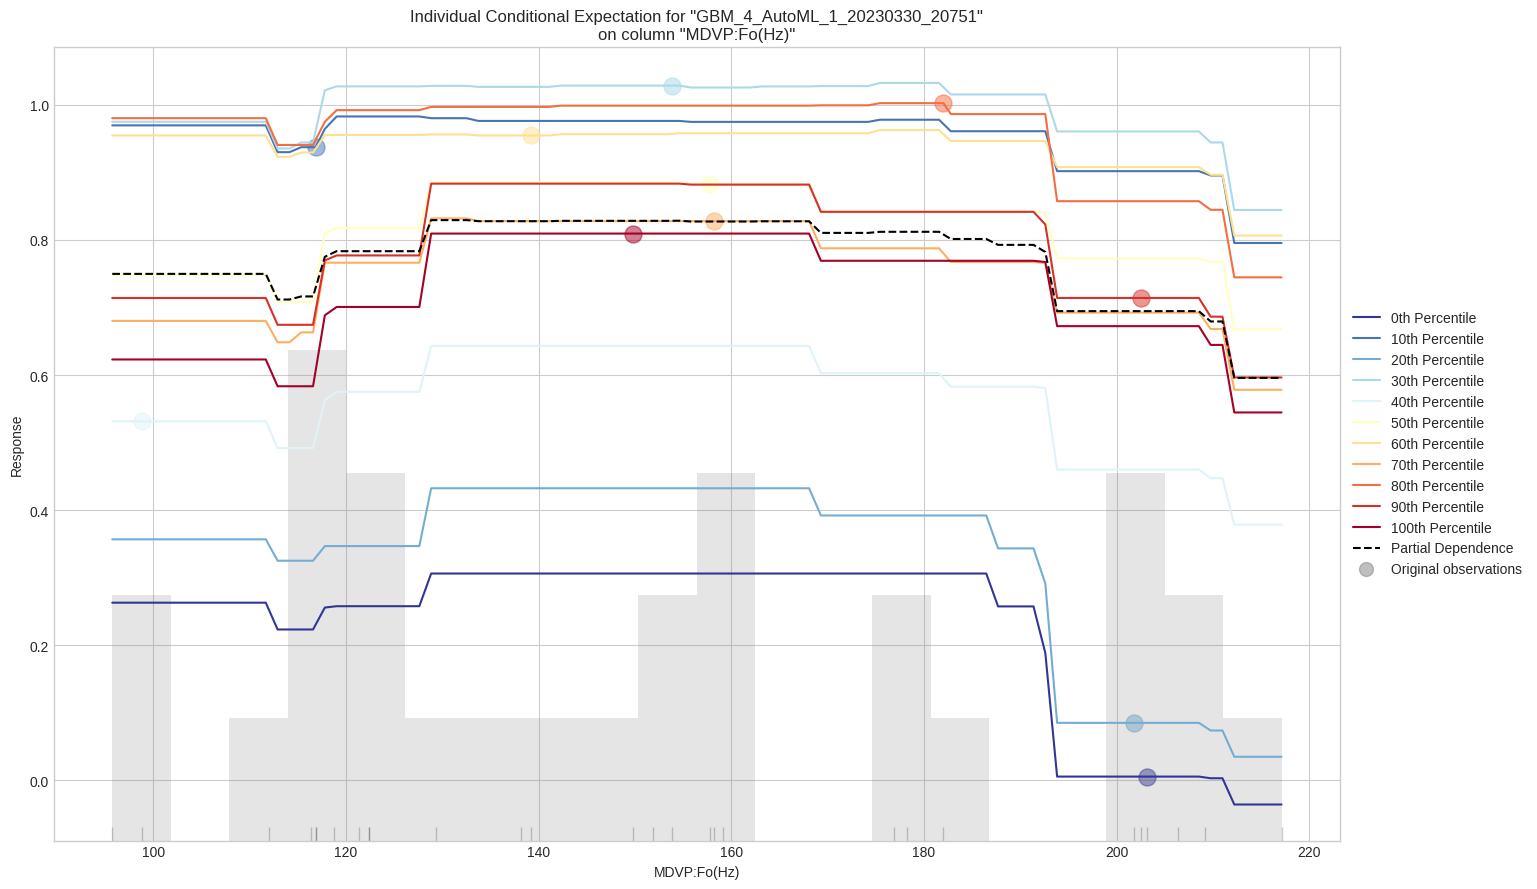

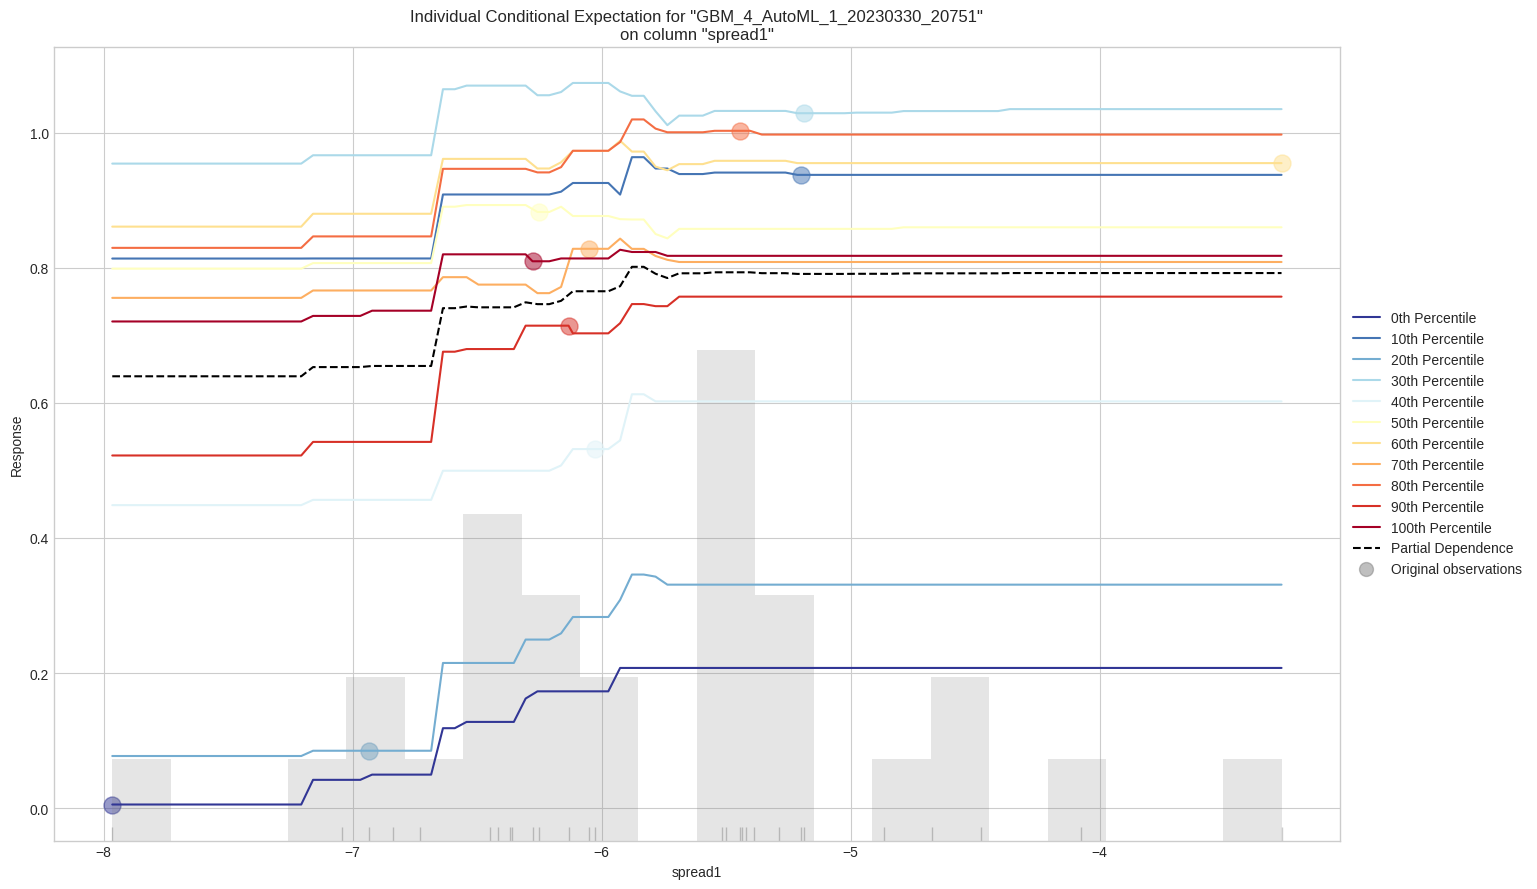

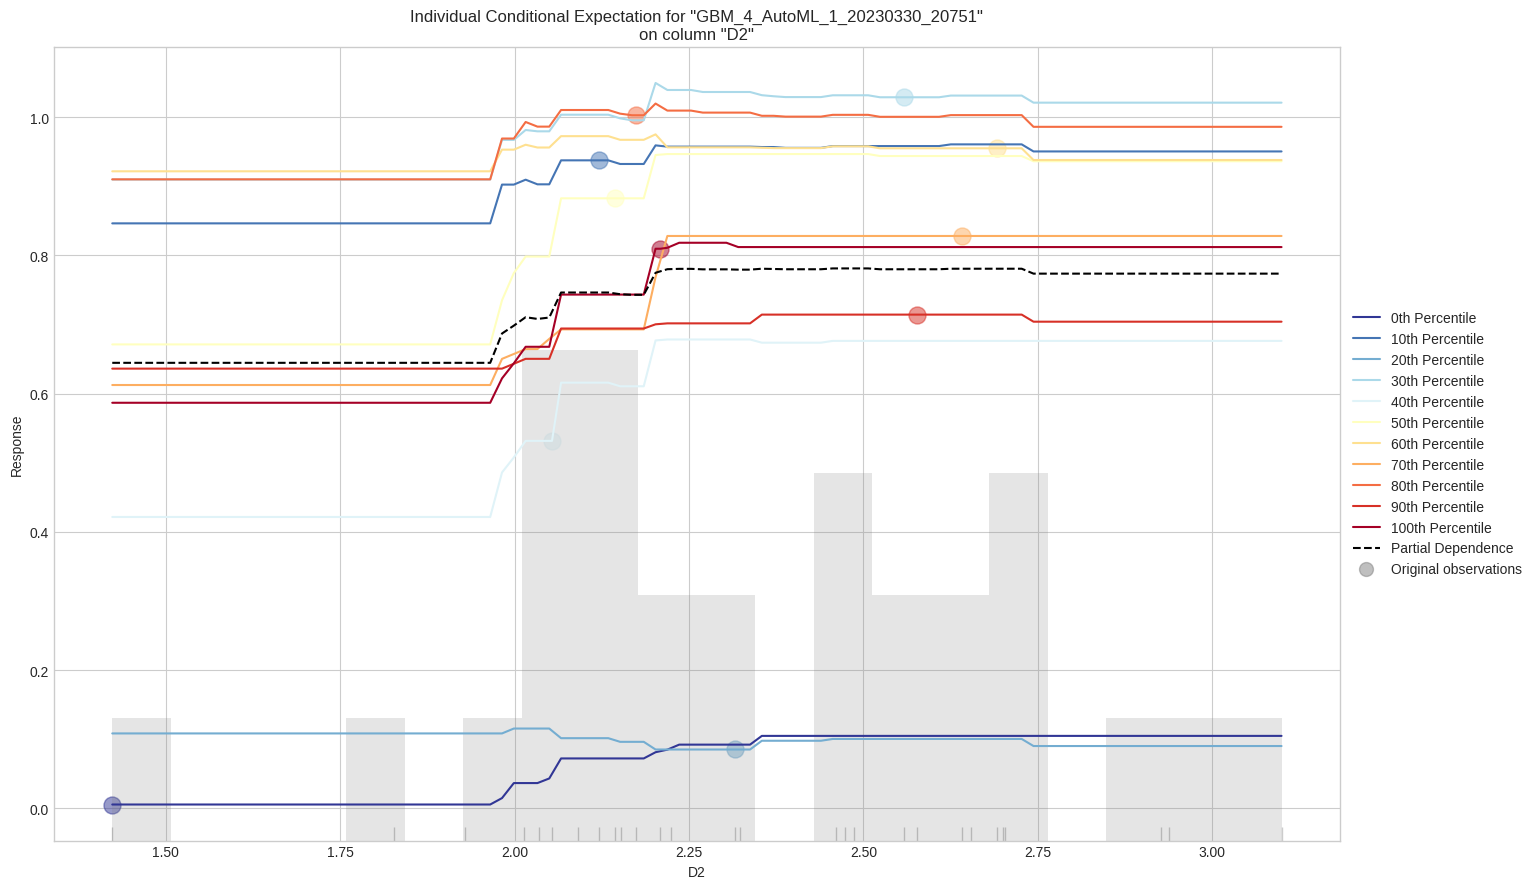

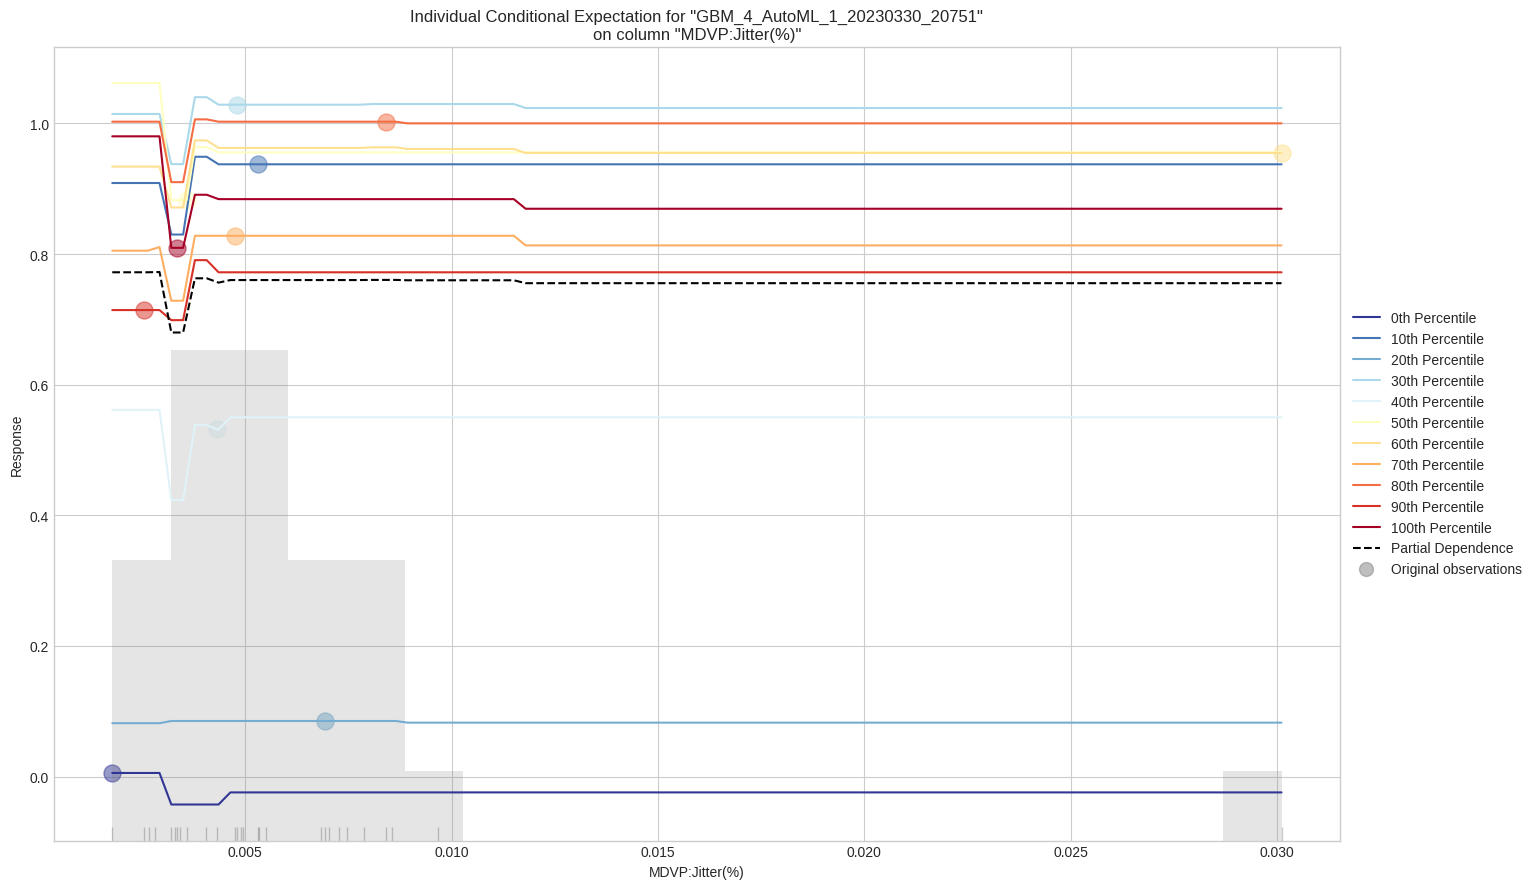

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [113]:
aml.leader.explain(df_test)